# Importing Important Libraries

In [1]:
import os
import cv2
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D

In [2]:
seed_constant = 5
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

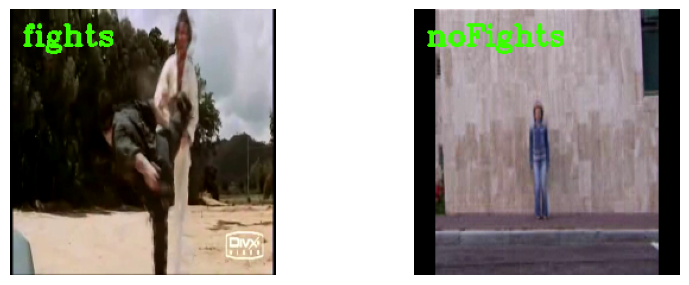

In [3]:
plt.figure(figsize = (20, 20))

all_classes_names = os.listdir('C:/Users/hp/Projects/HAR/Peliculas')

# random_range = random.sample(range(len(all_classes_names)), len(all_classes_names))

for counter, random_index in enumerate(range(len(all_classes_names)), 1):

    selected_class_Name = all_classes_names[random_index]

    video_files_names_list = os.listdir(f'C:/Users/hp/Projects/HAR/Peliculas/{selected_class_Name}')

    selected_video_file_name = random.choice(video_files_names_list)

    video_reader = cv2.VideoCapture(f'C:/Users/hp/Projects/HAR/Peliculas/{selected_class_Name}/{selected_video_file_name}')
    video_reader.set(1, 25)

    _, bgr_frame = video_reader.read()

    bgr_frame = cv2.resize(bgr_frame ,(224,224))
    video_reader.release()
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_COMPLEX, 0.8, (57, 255, 0), 2)

    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

In [5]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64

SEQUENCE_LENGTH = 20

DATASET_DIR = "C:/Users/hp/Projects/HAR/Peliculas"

CLASSES_LIST = ["noFights", "fights"]

# Data Preprocessing

In [5]:
def frames_extraction(video_path):

    frames_list = []

    video_reader = cv2.VideoCapture(video_path)

    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):

        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        success, frame = video_reader.read()

        if not success:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        normalized_frame = resized_frame / 255

        frames_list.append(normalized_frame)

    video_reader.release()

    return frames_list

features: A list containing the extracted frames of the videos.

labels:  A list containing the indexes of the classes associated with the videos.

In [6]:
def create_dataset():

    features = []
    labels = []
    video_files_paths = []

    for class_index, class_name in enumerate(CLASSES_LIST):

        print(f'Extracting Data of Class: {class_name}')

        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))

        for file_name in files_list:

            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            frames = frames_extraction(video_file_path)

            if len(frames) == SEQUENCE_LENGTH:

                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    features = np.asarray(features)
    labels = np.array(labels)

    return features, labels, video_files_paths

In [7]:
# Create the dataset.
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: noFights
Extracting Data of Class: fights


Using Keras to_categorical method to convert labels into one-hot-encoded vectors

In [8]:
one_hot_encoded_labels = to_categorical(labels)
print(one_hot_encoded_labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

In [9]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True, random_state = seed_constant)
features = None
labels = None

# Creating Model

LRCN -> Long-term Recurrent Convolutional Network

In [10]:
def create_LRCN_model():

    model = Sequential()

    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu'), input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))

    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))

    model.add(TimeDistributed(Conv2D(128, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))

    model.add(TimeDistributed(Conv2D(256, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))

    model.add(TimeDistributed(Flatten()))

    model.add(LSTM(32))

    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))


    model.summary()

    return model

In [11]:
model = create_LRCN_model()
input_shape = model.input_shape
print(input_shape)

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 20, 64, 64, 32)      │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 20, 16, 16, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 20, 16, 16, 64)      │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 20, 4, 4, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, 20, 4, 4, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_5 (TimeDistributed) │ (None, 20, 2, 2, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_6 (TimeDistributed) │ (None, 20, 2, 2, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_7 (TimeDistributed) │ (None, 20, 1, 1, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_8 (TimeDistributed) │ (None, 20, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 32)                  │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425,474 (1.62 MB)

 Trainable params: 425,474 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

(None, 20, 64, 64, 3)


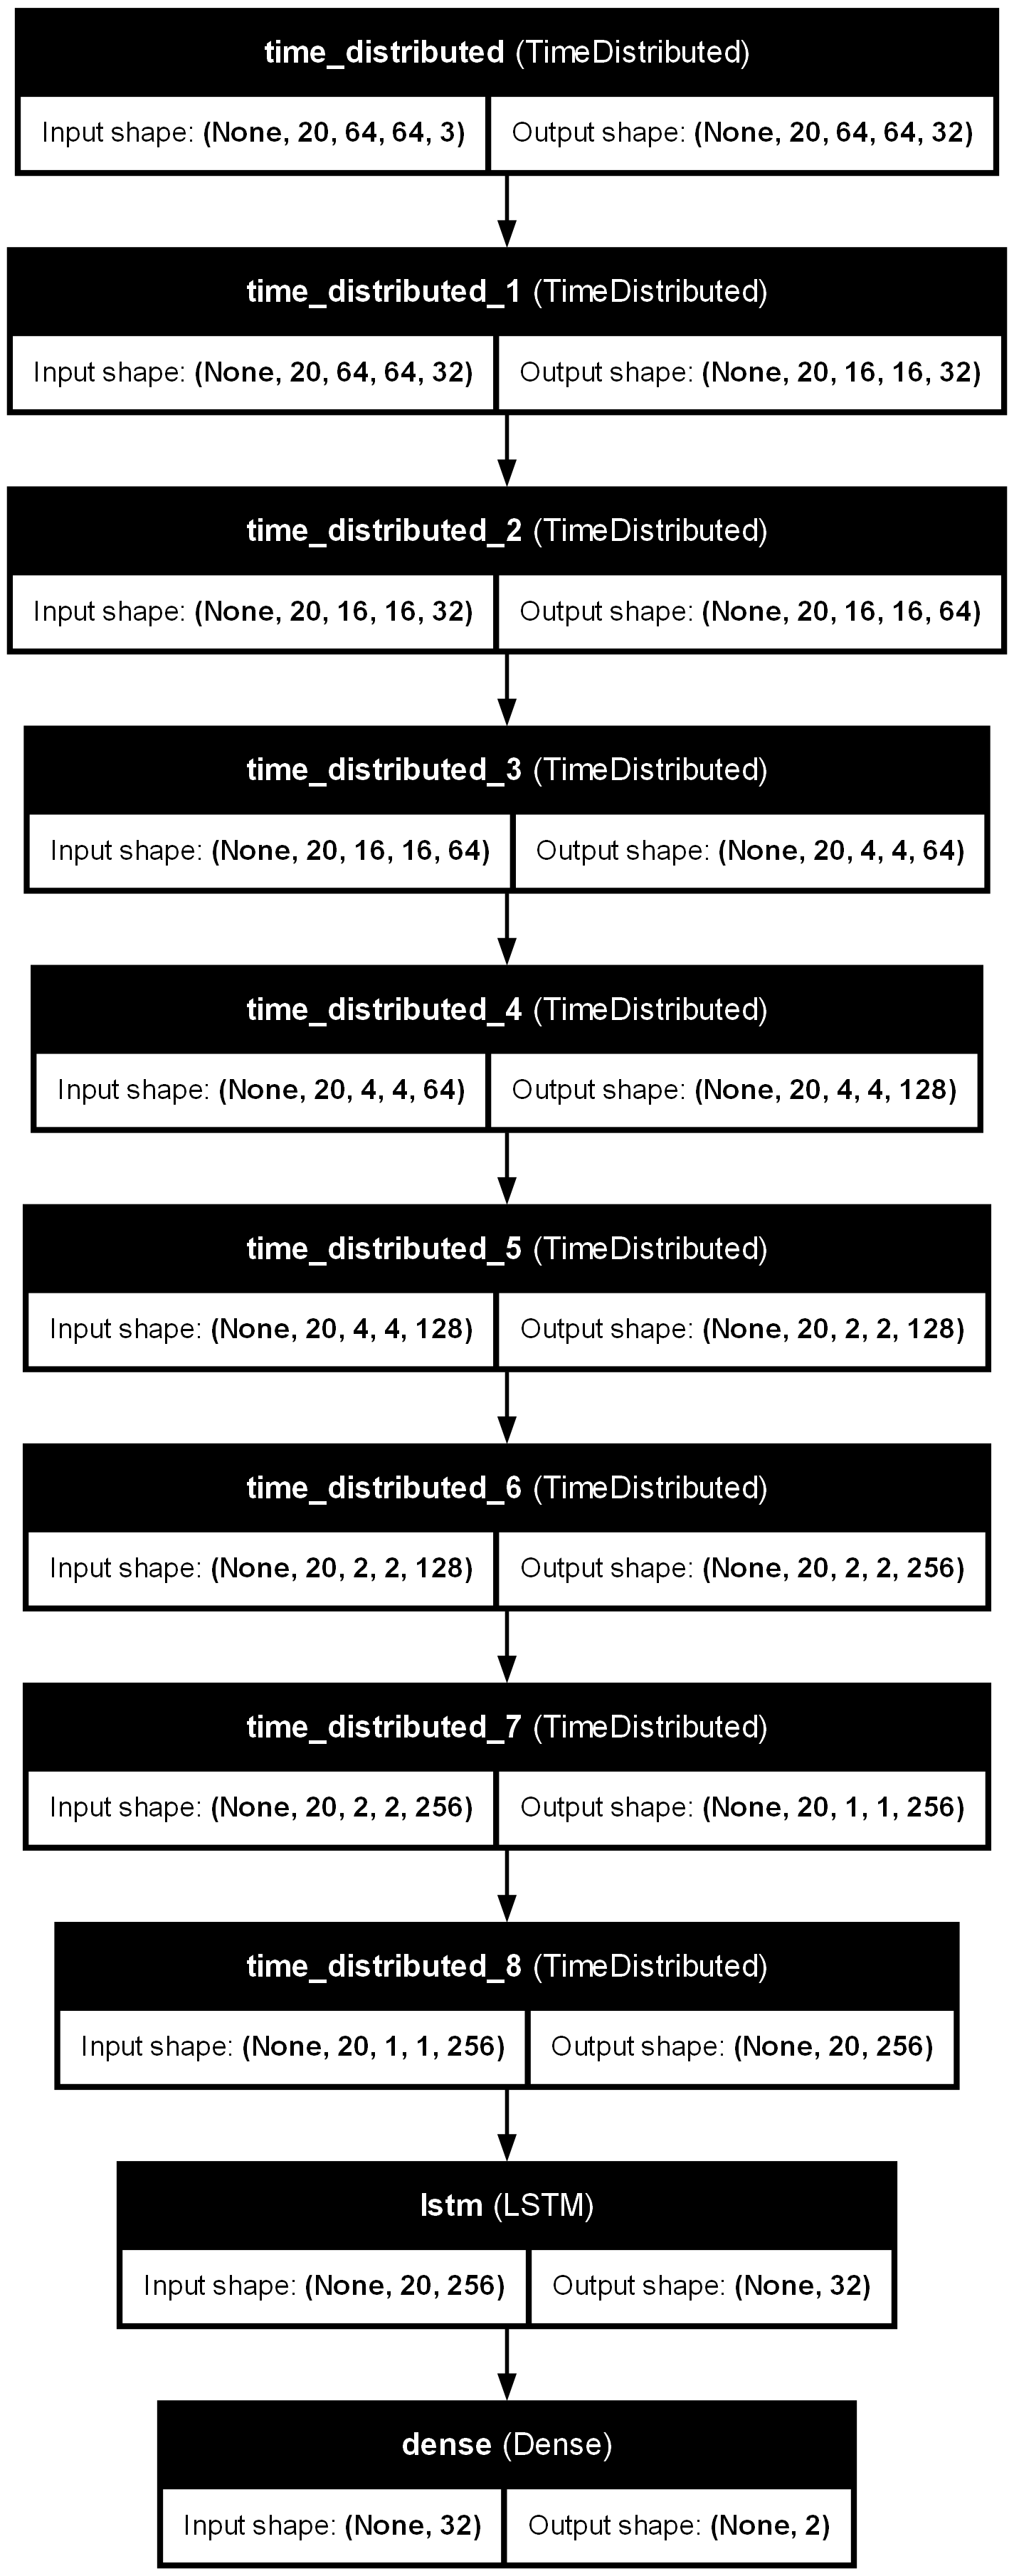

In [12]:
plot_model(model, to_file='Suspicious_Human_Activity_LRCN_Model.png', show_shapes=True, show_layer_names=True)


# Model Training

In [13]:
def add_noise(data, noise_factor=0.2):
    noise = np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = data + noise_factor * noise
    return np.clip(noisy_data, 0.0, 1.0)
noisy_features_train = add_noise(features_train)

early_stopping_callback = EarlyStopping(monitor = 'accuracy', patience = 10, mode = 'max', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

model_training_history = model.fit(x = noisy_features_train, y = labels_train, epochs = 70, batch_size = 4 , shuffle = True, validation_split = 0.25, callbacks = [early_stopping_callback])

Epoch 1/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 560ms/step - accuracy: 0.5969 - loss: 0.6896 - val_accuracy: 0.6842 - val_loss: 0.5649
Epoch 2/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 389ms/step - accuracy: 0.8446 - loss: 0.3720 - val_accuracy: 0.9474 - val_loss: 0.2185
Epoch 3/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 389ms/step - accuracy: 0.9625 - loss: 0.1485 - val_accuracy: 0.9211 - val_loss: 0.1909
Epoch 4/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 391ms/step - accuracy: 0.9726 - loss: 0.1288 - val_accuracy: 0.9737 - val_loss: 0.1320
Epoch 5/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 397ms/step - accuracy: 0.9794 - loss: 0.1102 - val_accuracy: 0.9737 - val_loss: 0.1206
Epoch 6/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 400ms/step - accuracy: 0.9677 - loss: 0.1055 - val_accuracy: 0.9474 - val_loss: 0.1413
Epoch 7/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 393ms/step - accuracy: 0.9827 - loss: 0.0868 - val_accuracy: 0.9737 - val_loss: 0.1071
Epoch 8/70
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 389ms/step - accuracy: 0.9857 - loss: 0.0769 - val_accu

In [26]:
import os
model.save("model/myharm.h5")
#model.save("fdharm.h5")

# Loss and Accuracy Graphs

In [15]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):

    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    plt.title(str(plot_name))


    plt.legend()

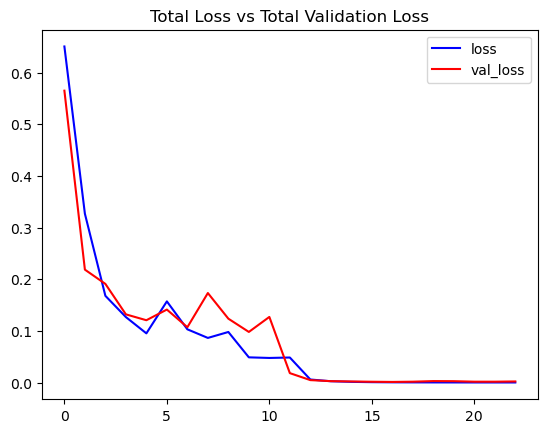

In [16]:
plot_metric(model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

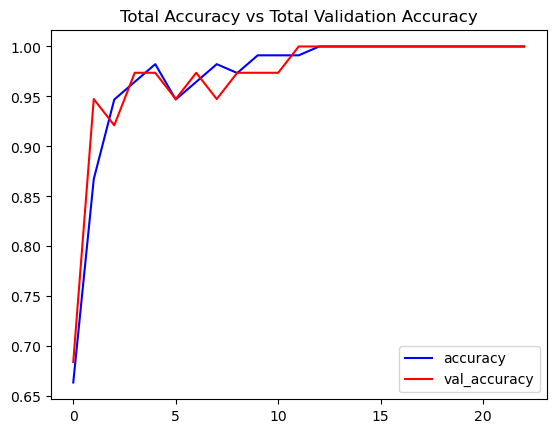

In [17]:
plot_metric(model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')


# Accuracy on Test Dataset

In [18]:
acc = 0
for i in range(len(features_test)):
    predicted_label = np.argmax(model.predict(np.expand_dims(features_test[i],axis =0))[0])
    actual_label = np.argmax(labels_test[i])
    if predicted_label == actual_label:
        acc += 1
acc = (acc * 100)/len(labels_test)
print("Accuracy =",acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━

In [36]:
%%writefile xyz.py
import streamlit as st
import cv2
import numpy as np
from collections import deque
import os
import base64
from keras.models import load_model

import sys
sys.stdout.reconfigure(encoding='utf-8')
sys.stderr.reconfigure(encoding='utf-8')


# Load the model
model_file_path = "C:/Users/hp/Projects/HAR/model/myharm.h5"  # Change this path accordingly
convlrcn_model = load_model(model_file_path)

# Define constants
IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64
SEQUENCE_LENGTH = 20
CLASSES_LIST = ["noFights", "fights"]

def perform_action_recognition(video_file_path, output_file_path):
    video_reader = cv2.VideoCapture(video_file_path)

    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc(*'mp4v'),
                                   int(video_reader.get(cv2.CAP_PROP_FPS)), (original_video_width, original_video_height))

    frames_queue = deque(maxlen=SEQUENCE_LENGTH)

    while video_reader.isOpened():
        ok, frame = video_reader.read()

        if not ok:
            break

        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        frames_queue.append(normalized_frame)

        if len(frames_queue) == SEQUENCE_LENGTH:
            # Perform action recognition
            predicted_labels_probabilities = convlrcn_model.predict(np.expand_dims(frames_queue, axis=0))[0]
            predicted_label = np.argmax(predicted_labels_probabilities)
            predicted_class_name = CLASSES_LIST[predicted_label]

            # Draw predicted class name on frame
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            # Draw predicted class name on frame with black background box
            text_size = cv2.getTextSize(predicted_class_name, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)[0]
            text_x, text_y = 10, 30  # Position of the text
            padding = 5  # Padding around the text
            box_coords = ((text_x, text_y + padding), (text_x + text_size[0] + padding * 2, text_y - text_size[1] - padding))

            # Draw the black background box
            cv2.rectangle(frame, box_coords[0], box_coords[1], (0, 0, 0), -1)

            # Draw the predicted class name on the frame
            cv2.putText(frame, predicted_class_name, (text_x + padding, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        video_writer.write(frame)

    video_reader.release()
    video_writer.release()

    return output_file_path

def get_binary_file_downloader_html(file_path, title="Download File"):
    with open(file_path, "rb") as f:
        video_bytes = f.read()
    b64 = base64.b64encode(video_bytes).decode()
    file_href = f'<a href="data:file/mp4;base64,{b64}" download="{os.path.basename(file_path)}">{title}</a>'
    return file_href

def main():
    st.title("Human Activity Prediction")

    uploaded_file = st.file_uploader("Upload a video", type=['mp4'])
    if uploaded_file is not None:
        test_videos_directory = 'test_videos'
        os.makedirs(test_videos_directory, exist_ok=True)
        video_file_path = os.path.join(test_videos_directory, uploaded_file.name)
        with open(video_file_path, "wb") as f:
            f.write(uploaded_file.read())
        st.success(f"You uploaded: {uploaded_file.name}")

        output_video_file_path = f'{test_videos_directory}/{uploaded_file.name}-Output-SeqLen{SEQUENCE_LENGTH}.mp4'
        output_video_file_path = perform_action_recognition(video_file_path, output_video_file_path)

        st.success("Prediction complete! You can download the output video below.")
        st.markdown(get_binary_file_downloader_html(output_video_file_path, "Download Predicted Video"), unsafe_allow_html=True)

if __name__ == "__main__":
    main()

Overwriting xyz.py


In [37]:
!streamlit run xyz.py --server.enableXsrfProtection false

^C


In [6]:
%%writefile video.py
import streamlit as st
from streamlit_webrtc import webrtc_streamer, VideoTransformerBase, WebRtcMode, RTCConfiguration
import cv2
import numpy as np
from collections import deque
import os
import base64
from keras.models import load_model

# Load the model
model_file_path = "C:/Users/hp/Projects/HAR/model/myharm.h5"  # Change this path accordingly
convlrcn_model = load_model(model_file_path)

# Define constants
IMAGE_HEIGHT = 64
IMAGE_WIDTH = 64
SEQUENCE_LENGTH = 20
CLASSES_LIST = ["noFights", "fights"]

class VideoTransformer(VideoTransformerBase):
    def _init_(self):
        super()._init_()
        self.frames_queue = deque(maxlen=SEQUENCE_LENGTH)

    def transform(self, frame):
        img = frame.to_ndarray(format="bgr24")

        resized_frame = cv2.resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH))
        normalized_frame = resized_frame / 255
        self.frames_queue.append(normalized_frame)

        if len(self.frames_queue) == SEQUENCE_LENGTH:
            predicted_class_name = self.predict_activity(self.frames_queue)

            # Draw predicted class name on frame
            cv2.putText(img, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        return img

    def predict_activity(self, frames_queue):
        # Perform action recognition using the loaded model
        predicted_labels_probabilities = convlrcn_model.predict(np.expand_dims(frames_queue, axis=0))[0]
        predicted_label = np.argmax(predicted_labels_probabilities)
        predicted_class_name = CLASSES_LIST[predicted_label]
        return predicted_class_name

def main():
    st.title("Human Activity Prediction")

    webrtc_streamer(
    key="example",
    video_processor_factory=VideoTransformer,
    mode=WebRtcMode.SENDRECV, rtc_configuration=RTCConfiguration(
					{"iceServers": [{"urls": ["stun:stun.l.google.com:19302"]}]}
					)
)

if __name__ == "__main__":
    main()

Overwriting video.py


In [7]:
!streamlit run video.py --server.enableXsrfProtection false

^C


In [33]:
# !pip install streamlit_webrtc

In [7]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [1]:
!pip uninstall tensorflow

^C


In [25]:
import keras 
print(keras. __version__)


2.13.1


In [1]:
!pip install tensorflow

In [86]:
!pip show streamlit

Name: streamlit
Version: 1.33.0
Summary: A faster way to build and share data apps
Home-page: https://streamlit.io
Author: Snowflake Inc
Author-email: hello@streamlit.io
License: Apache License 2.0
Location: C:\Users\hp\anaconda3\Lib\site-packages
Requires: altair, blinker, cachetools, click, gitpython, numpy, packaging, pandas, pillow, protobuf, pyarrow, pydeck, requests, rich, tenacity, toml, tornado, typing-extensions, watchdog
Required-by: streamlit-webrtc


In [22]:
!pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\hp\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [24]:
!pip show tensorflow

Name: tensorflow
Version: 2.13.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\hp\AppData\Roaming\Python\Python311\site-packages
Requires: tensorflow-intel
Required-by: 


In [46]:
import sys
print(sys.version)


3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]


In [72]:
!pip install -q keras-nightly

In [73]:
# import os

# os.environ["KERAS_BACKEND"] = "tensorflow"

# import keras
# import tensorflow as tf
# import numpy as np

In [25]:
import keras 
print(keras. __version__)


3.3.3
